In [102]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings("ignore")


In [103]:
data_dir = data_dir = "E:\\He_is_enough03 X UniqoXTech X Dreams\\Click_here\\Artificial Intelligence\\ML - AGRIQO\\Data set\\Agriqo(slider1) - Sheet1.csv"

data = pd.read_csv(data_dir)

In [104]:
col = ['Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12']
data.drop(columns=col, axis=1, inplace=True)

In [105]:
import numpy as np

augmented_data = []

for index, row in data.iterrows():
    for _ in range(15):
        new_row = {
            'Agricultural zone': row['Agricultural zone'],
            'month(chara)': row['month(chara)'],
            'rainfall (mm)': row['rainfall (mm)'] + np.random.uniform(-5, 5),
            'temperature(avg)': row['temperature(avg)'] + np.random.uniform(-2, 2),
            'humidity(avg)': row['humidity(avg)'] + np.random.uniform(-10, 10),
            'sunlight(hour)': row['sunlight(hour)'],
            'direction of wind(deg)': row['direction of wind(deg)'] + np.random.uniform(-35, 35),
            'velocity of wind(km/h)': row['velocity of wind(km/h)'] + np.random.uniform(-5, 5),
            'label': row['label']
        }
        augmented_data.append(new_row)

augmented_data_df = pd.DataFrame(augmented_data)

print(f"Total number of rows in augmented data: {len(augmented_data_df)}")


Total number of rows in augmented data: 5595


In [106]:
data = pd.concat([data, augmented_data_df], ignore_index=True)

In [107]:
from sklearn.cluster import KMeans

zone_features = data.iloc[:, 1:]  # Ignore 'month(chara)'
kmeans = KMeans(n_clusters=4, random_state=42)
data['zone_cluster'] = kmeans.fit_predict(zone_features)


ValueError: could not convert string to float: 'Aman'

In [82]:
data = pd.get_dummies(data, columns=['Agricultural zone'])

In [83]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data['label'] = encoder.fit_transform(data['label'])

label_mapping = {original_label: encoded_value for encoded_value, original_label in enumerate(encoder.classes_)}

print(label_mapping)

{'Aman': 0, 'Aush': 1, 'Badam Kharip - 1': 2, 'Badam robi': 3, 'Banana': 4, 'Boro': 5, 'Brinjal(Khorip)': 6, 'Brinjal(Robi)': 7, 'Corn(Robi)': 8, 'Guava': 9, 'Kharif cucumber': 10, 'Khorip Mug 1': 11, 'Mango': 12, 'Potato': 13, 'Rabi Cucumber': 14, 'Red Lentil': 15, 'Robi Mug': 16, 'Soybean': 17, 'Sugarcane': 18, 'Tomato': 19, 'Tula': 20, 'Wheat': 21, 'corn khorip-1': 22, 'garlic': 23, 'indian jujube': 24, 'jackfruit': 25, 'jute': 26, 'khorip green chilli': 27, 'khorip lau (grourd)': 28, 'khorip onion': 29, 'khorip pointed grourd': 30, 'khorip pumpkin Cucurbita': 31, 'licchi': 32, 'masterd seed': 33, 'papaya': 34, 'pineapple': 35, 'robi green chilli ': 36, 'robi lau (gourd)': 37, 'robi onion': 38, 'robi pointed gourd': 39, 'robi pumpkin Cucurbita': 40}


In [84]:
data.head()

,month(chara),rainfall (mm),temperature(avg),humidity(avg),sunlight(hour),direction of wind(deg),velocity of wind(km/h),label,Agricultural zone_Barisal,Agricultural zone_Bogra,...,Agricultural zone_Dhaka,Agricultural zone_Dinajpur,Agricultural zone_Faridpur,Agricultural zone_Jashore,Agricultural zone_Khulna,Agricultural zone_Mymensingh,Agricultural zone_Rajshahi,Agricultural zone_Rangamati,Agricultural zone_Rangpur,Agricultural zone_Sylhet
0,7.50,111.7,28.5,88.4,23.3,175.0,6.5,0,True,False,...,False,False,False,False,False,False,False,False,False,False
1,8.00,63.3,29.3,83.6,35.0,137.0,6.3,0,False,True,...,False,False,False,False,False,False,False,False,False,False
2,7.00,201.7,28.0,86.9,24.0,173.0,10.7,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,7.50,107.0,28.5,86.0,26.5,174.0,7.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,7.25,73.5,29.1,83.0,32.0,159.0,5.9,0,False,False,...,True,False,False,False,False,False,False,False,False,False


In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn import metrics

X = data.drop(['label'],axis=1)
y = data['label']

X_t, X_val, y_t, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

X_num = X_t[['rainfall (mm)', 'temperature(avg)', 'humidity(avg)', 'sunlight(hour)','direction of wind(deg)', 'velocity of wind(km/h)']]
X_cat = X_t[['month(chara)','Agricultural zone_Barisal','Agricultural zone_Bogra', 'Agricultural zone_Chittagonj',
       'Agricultural zone_Cumilla', 'Agricultural zone_Dhaka',
       'Agricultural zone_Dinajpur', 'Agricultural zone_Faridpur',
       'Agricultural zone_Jashore', 'Agricultural zone_Khulna',
       'Agricultural zone_Mymensingh', 'Agricultural zone_Rajshahi',
       'Agricultural zone_Rangamati', 'Agricultural zone_Rangpur',
       'Agricultural zone_Sylhet']]

scaled_list=[]
scalers = {}

agricultural_zones = [
    'Agricultural zone_Barisal', 'Agricultural zone_Bogra', 'Agricultural zone_Chittagonj',
    'Agricultural zone_Cumilla', 'Agricultural zone_Dhaka', 'Agricultural zone_Dinajpur', 
    'Agricultural zone_Faridpur', 'Agricultural zone_Jashore', 'Agricultural zone_Khulna',
    'Agricultural zone_Mymensingh', 'Agricultural zone_Rajshahi', 'Agricultural zone_Rangamati', 
    'Agricultural zone_Rangpur', 'Agricultural zone_Sylhet'
]

for zone in agricultural_zones:
    zone_data = X_num[X_t[zone] == 1]
    
    if not zone_data.empty:
        scaler = RobustScaler()
        scaled_zone_data = scaler.fit_transform(zone_data)
        scaled_zone_df = pd.DataFrame(scaled_zone_data, columns=X_num.columns, index=zone_data.index)
        
        scaled_list.append(scaled_zone_df)
        scalers[zone] = scaler 

scaled_data = pd.concat(scaled_list)
# print(scaled_data.shape)
scaled_data = pd.concat([scaled_data, X_cat], axis=1)
scaled_data['label']=y_t

# print(scaled_data.isnull().sum().sum())
# print(scaled_data.shape)

X_scaled = scaled_data.drop(['label'],axis=1)
y_scaled = scaled_data['label']

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

print("Train set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)

Train set size: (4296, 21)
Validation set size: (597, 21)
Test set size: (1075, 21)
Poly set size: (4296, 232)
[[ 1.         -0.26660352 -0.85538711 ...  0.          0.
   0.        ]
 [ 1.          1.66922124  0.57447997 ...  0.          0.
   0.        ]
 [ 1.          1.42228786  0.40933675 ...  0.          0.
   0.        ]
 ...
 [ 1.         -0.60972691 -0.74369651 ...  0.          0.
   0.        ]
 [ 1.         -0.46532265  0.42264601 ...  0.          0.
   0.        ]
 [ 1.          0.53670795 -0.11487457 ...  0.          0.
   0.        ]]


In [86]:
counter = 0
for cls, scaler in scalers.items():
    print(f"{counter} Class: {cls}")
    if cls == 8:
        # Extracting the median and IQR from the RobustScaler
        medians = scaler.center_  # This holds the median of each feature
        iqr = scaler.scale_  # This holds the IQR of each feature

        # Printing the median and IQR for each feature
        for feature, median, iqr_value in zip(X_num.columns, medians, iqr):
            print(f"Feature: {feature}")
            print(f"  Median: {median}")
            print(f"  IQR: {iqr_value}")
    # print("-" * 50)
    counter+=1

0 Class: Agricultural zone_Barisal
1 Class: Agricultural zone_Bogra
2 Class: Agricultural zone_Chittagonj
3 Class: Agricultural zone_Cumilla
4 Class: Agricultural zone_Dhaka
5 Class: Agricultural zone_Dinajpur
6 Class: Agricultural zone_Faridpur
7 Class: Agricultural zone_Jashore
8 Class: Agricultural zone_Khulna
9 Class: Agricultural zone_Mymensingh
10 Class: Agricultural zone_Rajshahi
11 Class: Agricultural zone_Rangamati
12 Class: Agricultural zone_Rangpur
13 Class: Agricultural zone_Sylhet


In [87]:
train_test_cols = set(X_train.columns)  # Train & Test columns
val_cols = set(X_val.columns)  # Validation columns

# Find extra columns in validation set
extra_in_val = val_cols - train_test_cols
print("Columns in Validation Set but NOT in Train/Test:", extra_in_val)

Columns in Validation Set but NOT in Train/Test: set()


In [88]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'HistGradientBoosting': HistGradientBoostingClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',objective='multi:softmax'),
    'KNN': KNeighborsClassifier(),
    'CatBoost': CatBoostClassifier(),
    'LightGBM': lgb.LGBMClassifier()
}

In [89]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average = 'micro')
    recall = recall_score(y_test, y_pred,average = 'micro')
    f1 = f1_score(y_test, y_pred,average = 'micro')
    cm = confusion_matrix(y_test, y_pred)
    # print(cm)
    # sns.heatmap(cm, annot=True, fmt='d')
    # plt.show()

    # Visualization
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='none', cmap='Blues')
    plt.colorbar(label="Count")

    num_classes = len(np.unique(y_test))
    ticks = np.linspace(0, num_classes - 1, num_classes)

    plt.xticks(ticks, labels=np.unique(y_test), fontsize=6, rotation=90)
    plt.yticks(ticks, labels=np.unique(y_test), fontsize=6)
    plt.xlabel("Predicted Labels", fontsize=10)
    plt.ylabel("True Labels", fontsize=10)
    plt.title("Confusion Matrix", fontsize=12)

    plt.grid(False)
    plt.tight_layout()
    plt.show()

    return accuracy, precision, recall, f1

In [90]:
results = {}
for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_poly, y_train, X_test, y_test)
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

results_data = pd.DataFrame(results)
results_data

ValueError: X has 21 features, but DecisionTreeClassifier is expecting 232 features as input.

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier(n_estimators=200)),
    ('gb', GradientBoostingClassifier()),
    ('cat', CatBoostClassifier(task_type="GPU",verbose=0)),
    ('xgb', XGBClassifier(tree_method='gpu_hist',use_label_encoder=False, eval_metric='mlogloss')),
], voting='soft')

voting_clf.fit(X_poly, y_train)
accuracy = voting_clf.score(X_test, y_test)
print("Voting Classifier Test Accuracy:", accuracy)

Voting Classifier Test Accuracy: 0.7404651162790697


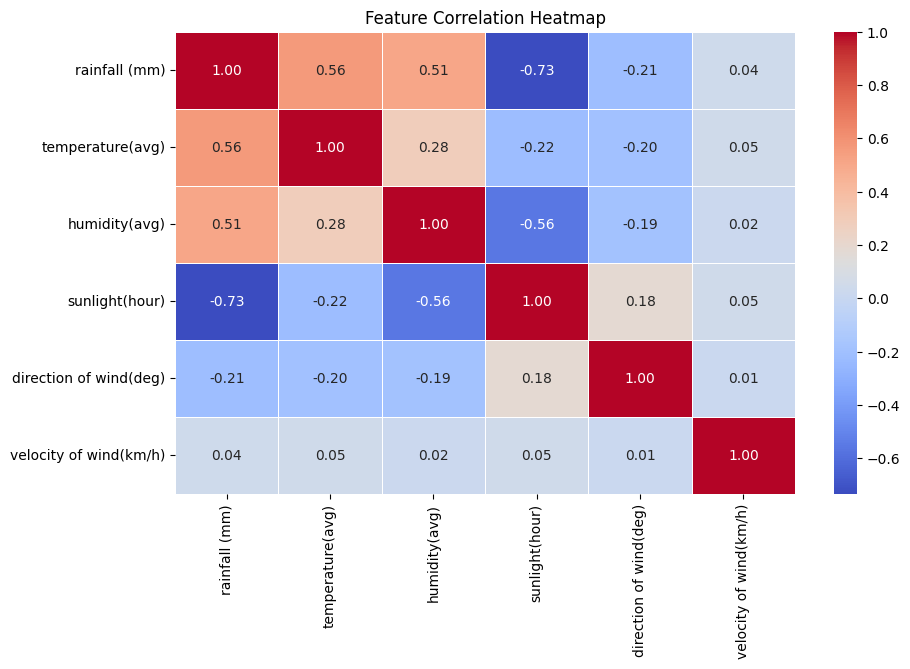

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = X_num.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Display the plot
plt.title("Feature Correlation Heatmap")
plt.show()




In [99]:
# Compute correlation with target variable
correlation_with_target = data.corrwith(y_t).abs().sort_values(ascending=False)

print(correlation_with_target)


label                           1.000000
rainfall (mm)                   0.128033
month(chara)                    0.108717
sunlight(hour)                  0.088941
Agricultural zone_Rangamati     0.087521
temperature(avg)                0.060759
Agricultural zone_Bogra         0.060409
Agricultural zone_Faridpur      0.060143
Agricultural zone_Mymensingh    0.053907
Agricultural zone_Khulna        0.046845
Agricultural zone_Cumilla       0.041302
direction of wind(deg)          0.036354
Agricultural zone_Barisal       0.036254
Agricultural zone_Jashore       0.029948
humidity(avg)                   0.028870
Agricultural zone_Rajshahi      0.026264
velocity of wind(km/h)          0.022727
Agricultural zone_Rangpur       0.017762
Agricultural zone_Dinajpur      0.006543
Agricultural zone_Chittagonj    0.006354
Agricultural zone_Dhaka         0.003513
Agricultural zone_Sylhet        0.003156
dtype: float64


In [61]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(X_train)


In [15]:
X_val.head()

,month(chara),rainfall (mm),temperature(avg),humidity(avg),sunlight(hour),direction of wind(deg),velocity of wind(km/h),Agricultural zone_Barisal,Agricultural zone_Bogra,Agricultural zone_Chittagonj,...,Agricultural zone_Dhaka,Agricultural zone_Dinajpur,Agricultural zone_Faridpur,Agricultural zone_Jashore,Agricultural zone_Khulna,Agricultural zone_Mymensingh,Agricultural zone_Rajshahi,Agricultural zone_Rangamati,Agricultural zone_Rangpur,Agricultural zone_Sylhet
3904,10.25,40.154514,27.671106,88.072692,39.5,232.671827,0.480980,False,False,False,...,False,False,True,False,False,False,False,False,False,False
810,9.00,53.572105,27.791390,80.509047,32.0,161.448916,6.676722,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1600,10.50,44.404464,28.978748,71.077689,46.0,182.308112,6.799999,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4387,7.75,70.296996,28.739775,83.878512,34.0,171.993386,2.083687,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5689,2.00,5.256155,18.511274,66.495502,52.5,170.932641,2.033923,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [16]:
y_val.head()

3904     3
810     19
1600    18
4387    24
5689    31
Name: label, dtype: int32

In [18]:
def preprocess_new_data(new_data,scalers):
    scaled_new_data = []
    for cls, scaler in scalers.items():
        scaled = scaler.transform(new_data)
        scaled_new_data.append(pd.DataFrame(scaled, columns=new_data.columns))
    return pd.concat(scaled_new_data)

new_data = pd.DataFrame([[40.155,27.671,88.073,39.5,232.672,0.481]],
                        columns=['rainfall (mm)', 'temperature(avg)', 'humidity(avg)', 'sunlight(hour)','direction of wind(deg)', 'velocity of wind(km/h)'])

scaled_new_data = preprocess_new_data(new_data, scalers)
scaled_new_data['month(chara)']=10.25

agricultural_zones = [
    'Agricultural zone_Barisal','Agricultural zone_Bogra', 'Agricultural zone_Chittagonj',
    'Agricultural zone_Cumilla', 'Agricultural zone_Dhaka',
    'Agricultural zone_Dinajpur', 'Agricultural zone_Faridpur',
    'Agricultural zone_Jashore', 'Agricultural zone_Khulna',
    'Agricultural zone_Mymensingh', 'Agricultural zone_Rajshahi',
    'Agricultural zone_Rangamati', 'Agricultural zone_Rangpur',
    'Agricultural zone_Sylhet'
]

for zone in agricultural_zones:
    if zone!= 'Agricultural zone_Faridpur':
      scaled_new_data[zone] = 0
    else:
      scaled_new_data[zone] = 1

print(scaled_new_data[10:15])

   rainfall (mm)  temperature(avg)  humidity(avg)  sunlight(hour)  \
0      -1.390518         -0.513273       0.482533        1.500000   
0       2.804060          0.379399       1.666080       -2.719298   
0       0.483437          0.451900       0.765640       -0.549296   
0       2.851422          1.033887       1.376996       -0.833333   
0       1.179352         -0.248058       1.567775       -7.500000   

   direction of wind(deg)  velocity of wind(km/h)  month(chara)  \
0                1.763972               -1.254911         10.25   
0                1.037660               -0.937054         10.25   
0                0.757076               -0.980173         10.25   
0                0.742779               -0.785128         10.25   
0                0.874393               -1.006554         10.25   

   Agricultural zone_Barisal  Agricultural zone_Bogra  \
0                          0                        0   
0                          0                        0   
0          

In [19]:
# Predict the label for new data
all_prediction=[]
for i in range (len(scaled_new_data)):
    predicted_class = voting_clf.predict(scaled_new_data.iloc[i].values.reshape(1, -1))
    all_prediction.append(predicted_class[0])
    # print("Predicted Class:", predicted_class[0])

from collections import Counter
def find_most_frequent_element(lst):
    element_counts = Counter(lst)
    most_frequent = element_counts.most_common(1)[0]
    return most_frequent

element, count = find_most_frequent_element(all_prediction)
print(f"The most frequent element is {element}, which appears {count} times.")

The most frequent element is 8, which appears 9 times.


In [59]:
X_num_val = X_val[['rainfall (mm)', 'temperature(avg)', 'humidity(avg)', 'sunlight(hour)', 
                   'direction of wind(deg)', 'velocity of wind(km/h)']]

# Create an empty DataFrame to store scaled values
scaled_val_list = []

# Iterate through each sample in X_val
for index, row in X_val.iterrows():
    # Identify the zone where this sample belongs
    zone = None
    for z in scalers.keys():
        if row[z] == 1:  # The zone where this sample belongs
            zone = z
            break
    
    # Apply the corresponding scaler (if found)
    if zone and zone in scalers:
        scaler = scalers[zone]  # Retrieve the correct scaler
        scaled_values = scaler.transform([row[X_num_val.columns]])  # Scale the numerical features
        scaled_row = pd.DataFrame(scaled_values, columns=X_num_val.columns, index=[index])
        scaled_val_list.append(scaled_row)

# Combine scaled rows into a single DataFrame
X_num_val_scaled = pd.concat(scaled_val_list)

# Reconstruct X_val with scaled numerical values
X_val_scaled = X_val.copy()
X_val_scaled[X_num_val.columns] = X_num_val_scaled

# Now measure accuracy using the scaled validation set
accuracy = voting_clf.score(X_val_scaled, y_val)
print("Voting Classifier Validation Accuracy:", accuracy)


Voting Classifier Validation Accuracy: 0.7236180904522613


In [75]:
import numpy as np
from sklearn.preprocessing import RobustScaler

num_classes = len(scalers)
num_features = 21

median_sum = np.zeros(num_features)
iqr_sum = np.zeros(num_features)

# Iterate over each class-specific scaler
for cls, scaler in scalers.items():
    median_sum += scaler.center_  # Sum of medians
    iqr_sum += scaler.scale_  # Sum of IQRs

# Step 2: Compute average median and IQR (feature-wise)
avg_median = median_sum / num_classes
avg_iqr = iqr_sum / num_classes

# Step 3: Create a new RobustScaler with these averages
class RobustScalerFixed(RobustScaler):
    def fit(self, X, y=None):
        self.center_ = avg_median  # Use averaged median
        self.scale_ = avg_iqr  # Use averaged IQR
        return self

# Step 4: Apply the new scaler to the validation set
scaler_val = RobustScalerFixed()
X_val_scaled = (X_val - avg_median) / avg_iqr  # Manual transformation

# Convert to DataFrame to maintain column structure
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)

print("Validation set successfully scaled!")


ValueError: operands could not be broadcast together with shapes (21,) (6,) (21,) 

In [ ]:
accuracy = voting_clf.score(X_val, y_val)
print("Voting Classifier Validation Accuracy:", accuracy)

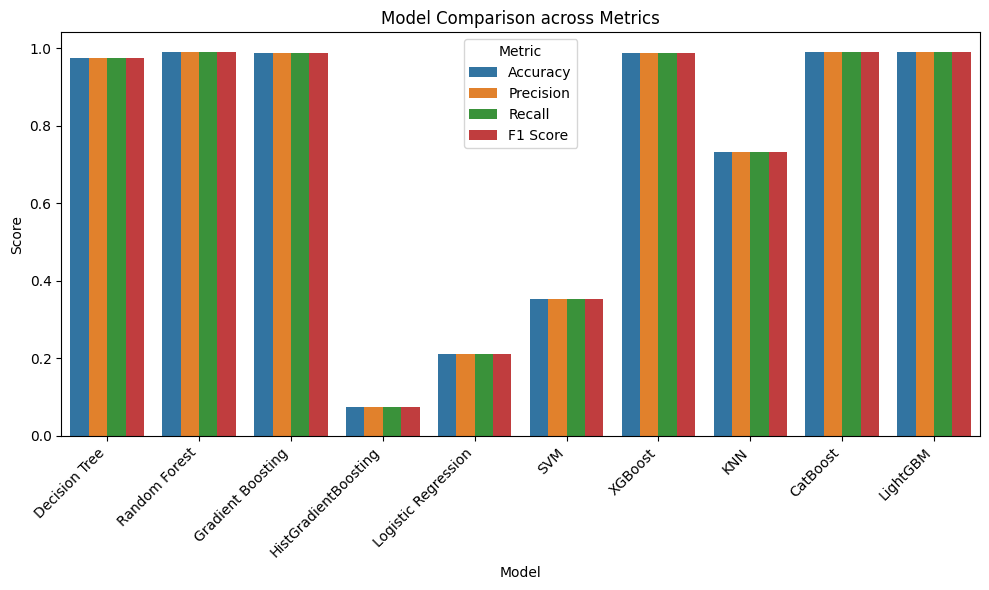

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reshape the results_data for easier plotting
results_data_t = results_data.T  # Transpose the DataFrame for easier plotting
results_data_t.reset_index(inplace=True)
results_data_t.columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']

# Set the figure size
plt.figure(figsize=(10, 6))

# Melt the DataFrame to have a single column for metric type
results_melted = results_data_t.melt(id_vars="Model",
                                     value_vars=["Accuracy", "Precision", "Recall", "F1 Score"],
                                     var_name="Metric",
                                     value_name="Score")

# Plot using seaborn barplot
sns.barplot(data=results_melted, x='Model', y='Score', hue='Metric')

# Adding labels and title
plt.title('Model Comparison across Metrics')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45, ha="right")  # Rotate the x labels for better readability
plt.tight_layout()

# Show plot
plt.show()